In [1]:
# from spectral import *
import spectral.io.envi as envi
import h5py
import numpy as np
import matplotlib.pyplot as plt
# import hyperspy.api as hs
import pandas as pd

# Import hrHSI file

In [2]:
def LoadHSI(path_to_hdf5, return_wlens = False, print_info = False):

    # Open the HDF5 file
    with h5py.File(path_to_hdf5, 'r') as f:
        if print_info:

            # List the names of all datasets in the file
            print("Datasets in the file:")

            for name in f.keys():
                print(name)

                # List the attributes of the dataset
                data = f[name]
                print("Attributes of the dataset:")

                for key in data.attrs.keys():
                    print(f"{key}: {data.attrs[key]}")


        # get the dataset from the file (this is how we save the objects downstairs)
        dataset = f['hypercube']
        hcube = f['hypercube'][:]

        if not return_wlens:
            return hcube
        else:
            return hcube, np.array(dataset.attrs['wavelength_nm'])

In [7]:
path_hrhsi = "data/FX10/"
hrhsi_file = LoadHSI(path_hrhsi + "leaf_test1.hdf5", return_wlens=True, print_info=False)

img = hrhsi_file[0]
wavelengths = hrhsi_file[1]
wavelengths = wavelengths.tolist()

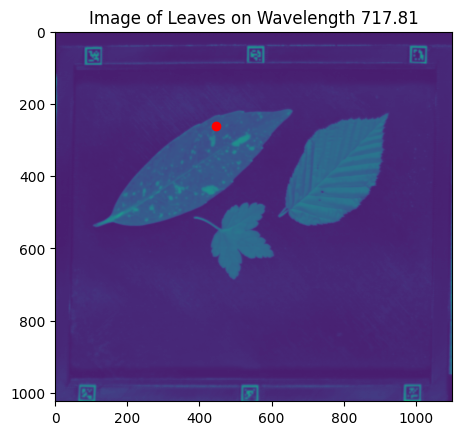

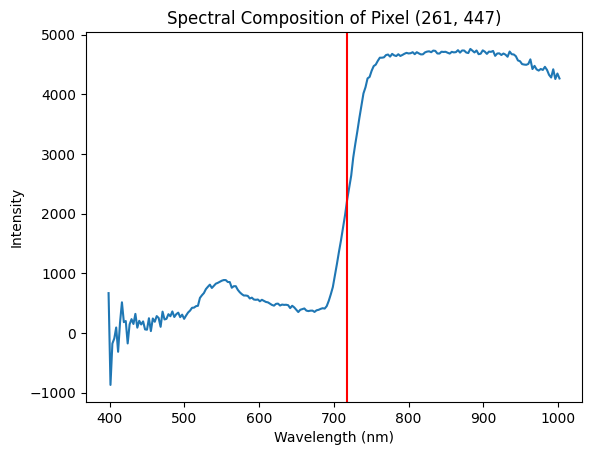

In [8]:
# Select a pixel on a leaf
selected_pixel = (261, 447)
selected_spectrum = 120

# Print array as image
plt.figure()
plt.imshow(img[selected_spectrum])
plt.plot(selected_pixel[1], selected_pixel[0], 'ro')
plt.title('Image of Leaves on Wavelength ' + str(wavelengths[selected_spectrum]))
plt.show()


# Print spectral composition of a single pixel
spectrum = img[:, selected_pixel[0], selected_pixel[1]]

# Plot the spectrum
plt.figure()
plt.plot(wavelengths, spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Spectral Composition of Pixel ' + str(selected_pixel))
plt.axvline(wavelengths[selected_spectrum], color='r', linestyle='-')
plt.show()

## Extracting needed data from the image

In [9]:
# Get the intensity on the selected pixel on the selected wavelength
print('Intensity of selected pixel on selected wavelength:', spectrum[selected_spectrum])


Intensity of selected pixel on selected wavelength: 2228


## Load Snapshot file

In [15]:
path_snapshot = "data/Snapshot/leaf_test_processed/leaf_test/"

# Open image
img_snap = envi.open(path_snapshot + "image_0000000000.hdr", path_snapshot + "image_0000000000.raw")
np_array_snap = img_snap.load()

np_array_snap = np.array(img_snap.load())
print(np_array_snap.shape)

(215, 407, 24)


In [37]:
# print(img_snap)
img_snap.metadata['wavelength']

['667.7562666',
 '679.7296883',
 '691.7031101',
 '703.6765318',
 '715.6499535',
 '727.6233752',
 '739.5967969',
 '751.5702186',
 '763.5436403',
 '775.517062',
 '787.4904838',
 '799.4639055',
 '811.4373272',
 '823.4107489',
 '835.3841706',
 '847.3575923',
 '859.331014',
 '871.3044357',
 '883.2778574',
 '895.2512792',
 '907.2247009',
 '919.1981226',
 '931.1715443',
 '943.144966']

In [22]:
# Show info for img_snap
print(img_snap)

wavelengths_snapshot = list[667.756267, 679.729688, 691.703110, 703.676532, 715.649953, 
                            727.623375, 739.596797, 751.570219, 763.543640, 775.517062, 
                            787.490484, 799.463905, 811.437327, 823.410749, 835.384171, 
                            847.357592, 859.331014, 871.304436, 883.277857, 895.251279, 
                            907.224701, 919.198123, 931.171544, 943.144966]


	Data Source:   '.\data/Snapshot/leaf_test_processed/leaf_test/image_0000000000.raw'
	# Rows:            215
	# Samples:         407
	# Bands:            24
	Interleave:        BIP
	Quantization:  32 bits
	Data format:   float32


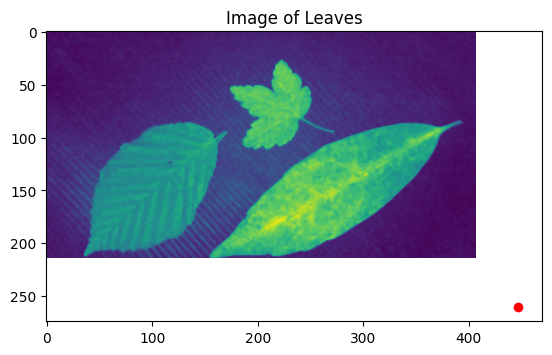

In [21]:
# Print array as image
plt.figure()
plt.imshow(np_array_snap[:, :, 6])
plt.plot(selected_pixel[1], selected_pixel[0], 'ro')
plt.title('Image of Leaves')
plt.show()


In [ ]:
# Specify dimensions
width = 407
height = 214
bands = 25

raw_data = np.fromfile(path_snapshot + "image_0000000000.raw", dtype=np.uint16)
raw_data = raw_data.reshape((height, width, bands))